In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# PPO_EKF_25

|||
|-|-|
| randomize_offset | false |
| horizon | 32768 |
| reward_fn | rw_distance_normalized |
| map | Town01 |

In [14]:
avg_dist_25 = pd.read_csv('data/PPO_EKF_25/eval_avg_dist_predictions.csv', index_col=0)
avg_dist_25 = avg_dist_25.sort_values(by='step')
avg_dist_25.drop_duplicates(subset='step', keep='first', inplace=True)
print(avg_dist_25.shape)
avg_dist_25.head()

(70, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,eval/avg_dist_predictions,5,1749852778556,126.661554
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,eval/avg_dist_predictions,10,1749856765165,86.946263
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,eval/avg_dist_predictions,15,1749860807634,32.458131
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,eval/avg_dist_predictions,20,1749864898832,32.647770
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,eval/avg_dist_predictions,25,1749869094273,83.141841


In [19]:
train_reward_25 = pd.read_csv('data/PPO_EKF_25/train_reward.csv', index_col=0)
train_reward_25 = train_reward_25.sort_values(by='step')
train_reward_25.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_reward_25.shape)
train_reward_25.head()

(323, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/reward,1,1749850399655,144327.713730
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/reward,2,1749851175264,151009.094475
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/reward,3,1749851960735,159716.166054
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/reward,4,1749852745728,161261.979895
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/reward,5,1749853566088,161316.518142


In [20]:
train_std_25 = pd.read_csv('data/PPO_EKF_25/train_std.csv', index_col=0)
train_std_25 = train_std_25.sort_values(by='step')
train_std_25.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_std_25.shape)
train_std_25.head()

(323, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/std,1,1749850400084,0.398563
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/std,2,1749851175600,0.396879
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/std,3,1749851961094,0.395176
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/std,4,1749852746157,0.393535
PPO_EKF_25 (1-80),a956db13455843c9904a0a59a0e29fb1,train/std,5,1749853566527,0.391914


# PPO_EKF_30

|||
|-|-|
| randomize_offset | false |
| horizon | 16384 |
| reward_fn | rw_distance_normalized |
| map | Town01 |

In [23]:
avg_dist_30 = pd.read_csv('data/PPO_EKF_30/eval_avg_dist_predictions.csv', index_col=0)
avg_dist_30 = avg_dist_30.sort_values(by='step')
avg_dist_30.drop_duplicates(subset='step', keep='first', inplace=True)
print(avg_dist_30.shape)
avg_dist_30.head()

(20, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,eval/avg_dist_predictions,5,1750560480416,148.714148
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,eval/avg_dist_predictions,10,1750562600622,154.063512
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,eval/avg_dist_predictions,15,1750564750839,59.542353
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,eval/avg_dist_predictions,20,1750566906415,57.072532
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,eval/avg_dist_predictions,25,1750569086082,35.598136


In [24]:
train_reward_30 = pd.read_csv('data/PPO_EKF_30/train_reward.csv', index_col=0)
train_reward_30 = train_reward_30.sort_values(by='step')
train_reward_30.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_reward_30.shape)
train_reward_30.head()

(101, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/reward,1,1750559194773,48206.568284
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/reward,2,1750559612953,51498.977193
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/reward,3,1750560029143,52116.320695
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/reward,4,1750560447840,51424.229096
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/reward,5,1750560894600,54587.396544


In [25]:
train_std_30 = pd.read_csv('data/PPO_EKF_30/train_std.csv', index_col=0)
train_std_30 = train_std_30.sort_values(by='step')
train_std_30.drop_duplicates(subset='step', keep='first', inplace=True)
print(train_std_30.shape)
train_std_30.head()

(101, 5)


,Run ID,metric,step,timestamp,value
Run,,,,,
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/std,1,1750559195161,0.399497
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/std,2,1750559613287,0.398768
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/std,3,1750560029477,0.397882
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/std,4,1750560448169,0.397014
PPO_EKF_30 (1-101),c8ac52406710488689c07cb446b44995,train/std,5,1750560894971,0.396078


# PPO_EKF_29

|||
|-|-|
| randomize_offset | false |
| horizon | 32768 |
| reward_fn | rw_negative_distance |
| map | Town01 |

# Figures

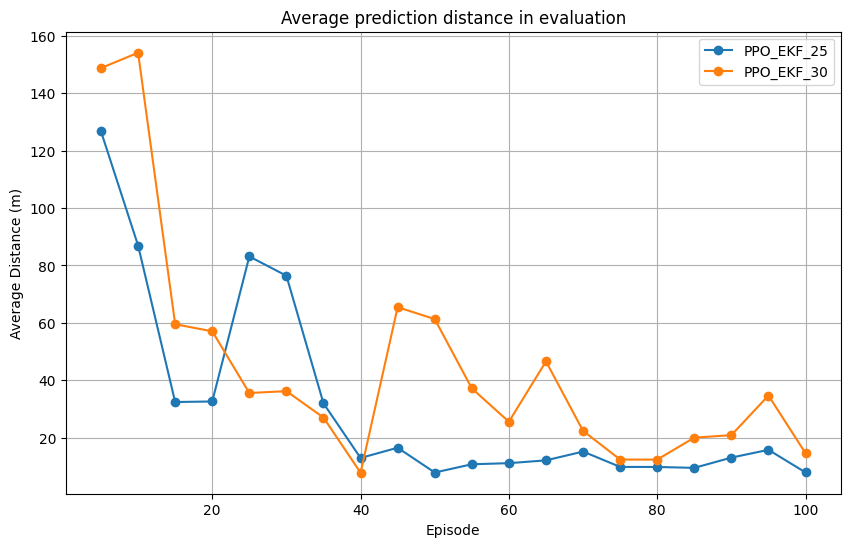

In [27]:
episodes = 100

plt.figure(figsize=(10, 6))
plt.plot(
    avg_dist_25[avg_dist_25['step'] <= episodes]['step'],
    avg_dist_25[avg_dist_25['step'] <= episodes]['value'],
    marker='o',
    label='PPO_EKF_25'
)
plt.plot(
    avg_dist_30[avg_dist_30['step'] <= episodes]['step'],
    avg_dist_30[avg_dist_30['step'] <= episodes]['value'],
    marker='o',
    label='PPO_EKF_30'
)
plt.xlabel('Episode')
plt.ylabel('Average Distance (m)')
plt.title('Average prediction distance in evaluation')
plt.grid(True)
plt.legend()
plt.show()

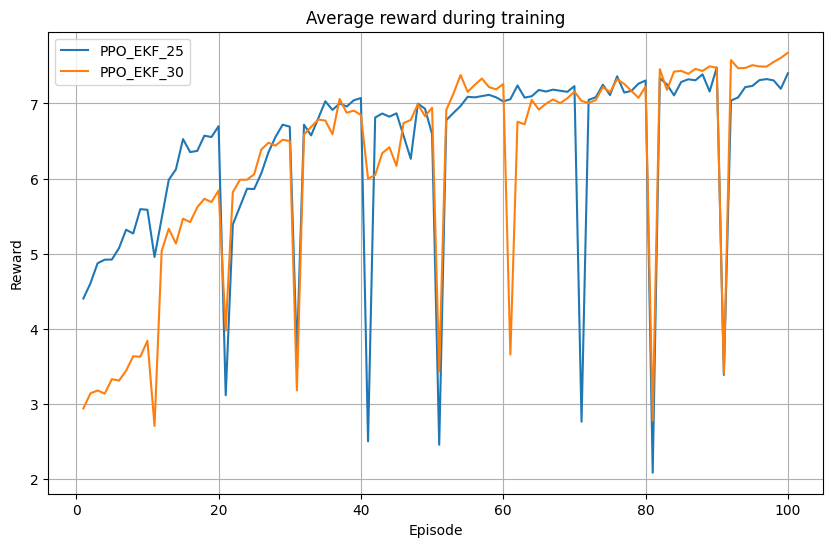

In [32]:
episodes = 100

plt.figure(figsize=(10, 6))
plt.plot(
    train_reward_25[train_reward_25['step'] <= episodes]['step'],
    train_reward_25[train_reward_25['step'] <= episodes]['value'] / 32768,
    # marker='o',
    label='PPO_EKF_25'
)
plt.plot(
    train_reward_30[train_reward_30['step'] <= episodes]['step'],
    train_reward_30[train_reward_30['step'] <= episodes]['value'] / 16384,
    # marker='o',
    label='PPO_EKF_30'
)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Average reward during training')
plt.grid(True)
plt.legend()
plt.show()

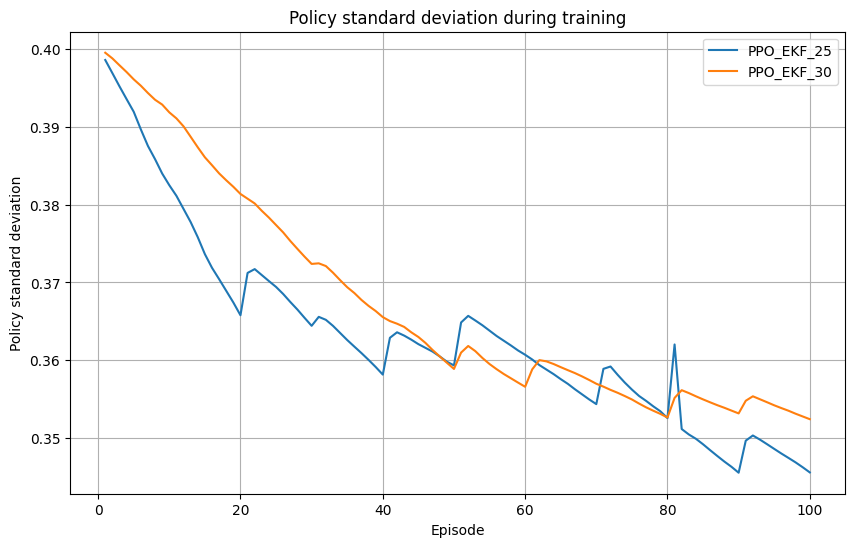

In [33]:
episodes = 100

plt.figure(figsize=(10, 6))
plt.plot(
    train_std_25[train_std_25['step'] <= episodes]['step'],
    train_std_25[train_std_25['step'] <= episodes]['value'],
    # marker='o',
    label='PPO_EKF_25'
)
plt.plot(
    train_std_30[train_std_30['step'] <= episodes]['step'],
    train_std_30[train_std_30['step'] <= episodes]['value'],
    # marker='o',
    label='PPO_EKF_30'
)
plt.xlabel('Episode')
plt.ylabel('Policy standard deviation')
plt.title('Policy standard deviation during training')
plt.grid(True)
plt.legend()
plt.show()